In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/multiple-skin-disease-detection-and-classification/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0059561.jpg
/kaggle/input/multiple-skin-disease-detection-and-classification/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0069932.jpg
/kaggle/input/multiple-skin-disease-detection-and-classification/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0065476.jpg
/kaggle/input/multiple-skin-disease-detection-and-classification/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0057072.jpg
/kaggle/input/multiple-skin-disease-detection-and-classification/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0054359.jpg
/kaggle/input/multiple-skin-disease-detection-and-classification/Skin Cancer Dataset/Acitinic Keratosis/ISIC_0060775.jpg
/kaggle/input/multiple-skin-disease-detection-and-classification/Skin Cancer Dataset/Acitinic Keratosis/ISIC_8080515.jpg
/kaggle/input/multiple-skin-disease-detection-and-classification/Skin Cancer Dataset/Acitinic Keratosis/ISIC_6529148.jpg
/kaggle/input/multiple-skin-dise

In [2]:
import os

In [3]:
!pip install split-folders

In [4]:
#/kaggle/input/multiple-skin-disease-detection-and-classification/Skin Cancer Dataset

In [5]:
import splitfolders

input_folder = r'/kaggle/input/multiple-skin-disease-detection-and-classification/Skin Cancer Dataset'

# Split with a ratio
# To only split into training and validation set, set a tuple to ratio, i.e; 80/20
#Train, val, test
splitfolders.ratio(input_folder, output=r'/kaggle/working/Split', 
                   seed=42, ratio=(.7, .1, .2), 
                   group_prefix=None) # default values

Copying files: 4109 files [00:06, 665.24 files/s]


In [6]:
#/kaggle/working/Split/train

In [7]:
train_dir = '/kaggle/working/Split/train'
val_dir = '/kaggle/working/Split/val'
test_dir = '/kaggle/working/Split/test'
batch_size = 64

In [8]:
from tensorflow.keras.utils import image_dataset_from_directory # type: ignore

def load_data(data_dir: str):

    ds = image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="categorical",
    seed=123,
    image_size=(150,150),
    batch_size=batch_size)

    return ds

In [9]:
train_ds = load_data(train_dir)
val_ds = load_data(val_dir)
test_ds = load_data(test_dir)

Found 2874 files belonging to 9 classes.
Found 409 files belonging to 9 classes.
Found 824 files belonging to 9 classes.


In [10]:
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import seaborn as sns

In [11]:
model = Sequential()

model.add(layers.Input((150, 150, 3)))
model.add(layers.Rescaling(1./255))

model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)) )

model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)) )

model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)) )

model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)) )

model.add(layers.Flatten())

model.add(layers.Dense(64, activation="relu"))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(9, activation="softmax"))

adam = optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

model.summary()
##################################


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         663,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 766,697 (2.92 MB)

 Trainable params: 766,697 (2.92 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# def some callbacks
'''LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss",
                                        factor=0.1,
                                        patience=3,
                                        verbose=1,
                                        min_lr=0)'''

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss',
                                       patience=20,
                                       verbose=0,
                                       restore_best_weights=True)

# fit the model with training data
history = model.fit(
        train_ds,
        epochs=50,
        validation_data=val_ds,
        callbacks=[EarlyStopper]
        )


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 25s 418ms/step - accuracy: 0.1137 - loss: 2.2079 - val_accuracy: 0.2127 - val_loss: 2.1429
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 341ms/step - accuracy: 0.1848 - loss: 2.1459 - val_accuracy: 0.2787 - val_loss: 2.0075
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 357ms/step - accuracy: 0.2142 - loss: 2.0784 - val_accuracy: 0.3105 - val_loss: 1.9139
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 344ms/step - accuracy: 0.2336 - loss: 2.0300 - val_accuracy: 0.2616 - val_loss: 1.9247
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 350ms/step - accuracy: 0.2582 - loss: 1.9964 - val_accuracy: 0.3545 - val_loss: 1.8757
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 345ms/step - accuracy: 0.2927 - loss: 1.9306 - val_accuracy: 0.3741 - val_loss: 1.7850
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 343ms/step - accuracy: 0.3133 - loss: 1.8882 - val_accuracy: 0.3472 - val_loss: 1.7345
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 356ms/step - accuracy: 0.3240 - loss: 1.8555 - val_accu

In [13]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

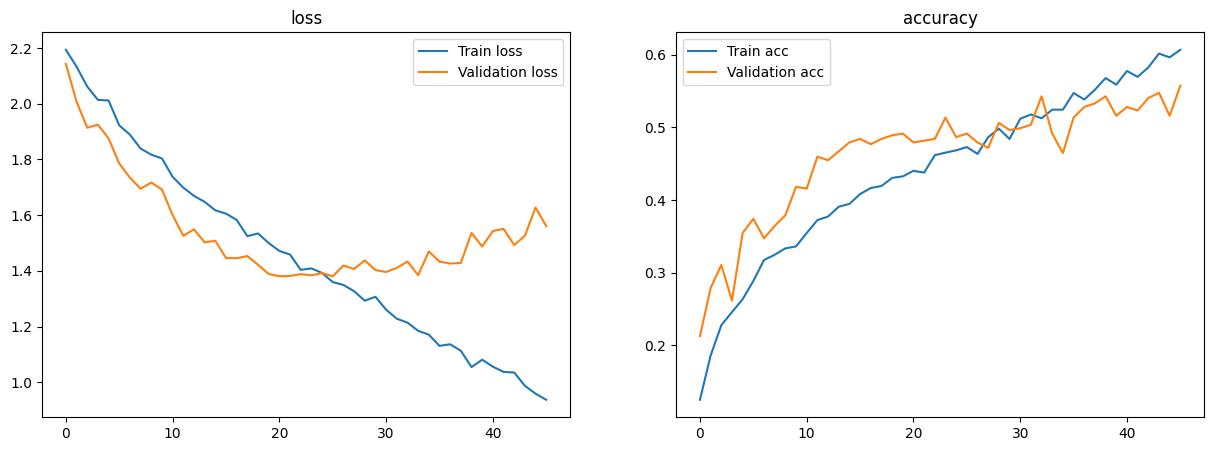

In [14]:
plot_history(history)

In [15]:
history.history

{'accuracy': [0.12491301447153091,
  0.18580375611782074,
  0.22755740582942963,
  0.24565066397190094,
  0.2633959650993347,
  0.28844815492630005,
  0.3173277676105499,
  0.3246346414089203,
  0.3333333432674408,
  0.3361169099807739,
  0.3545581102371216,
  0.37230339646339417,
  0.3771746754646301,
  0.3907445967197418,
  0.39457201957702637,
  0.40814197063446045,
  0.4164927005767822,
  0.41927626729011536,
  0.43041056394577026,
  0.4324982464313507,
  0.4401530921459198,
  0.437717467546463,
  0.4617258310317993,
  0.46520528197288513,
  0.468336820602417,
  0.4728601276874542,
  0.46346554160118103,
  0.4864300489425659,
  0.4982602596282959,
  0.48399442434310913,
  0.51183021068573,
  0.517745316028595,
  0.5125260949134827,
  0.5243563055992126,
  0.5243563055992126,
  0.5473207831382751,
  0.5382741689682007,
  0.5518441200256348,
  0.5678496956825256,
  0.5588030815124512,
  0.5775921940803528,
  0.5695894360542297,
  0.5824634432792664,
  0.6016005277633667,
  0.59638136

In [16]:
model.save("model_baseline.keras")